<a href="https://colab.research.google.com/github/MariiaKV/analytics_portfolio/blob/main/revenue_cogort_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [14]:
! gdown 1FJQxJR_JjXwkMxG2NQMrUUeVTi3tYWjBbUAxbPjvwMw
! gdown 1guDAARqahzMJ806LHSaJYF5sFgv1jGgwcW1mhtWeHzc

Downloading...
From (original): https://drive.google.com/uc?id=1FJQxJR_JjXwkMxG2NQMrUUeVTi3tYWjBbUAxbPjvwMw
From (redirected): https://docs.google.com/spreadsheets/d/1FJQxJR_JjXwkMxG2NQMrUUeVTi3tYWjBbUAxbPjvwMw/export?format=xlsx
To: /content/installs data.xlsx
12.7kB [00:00, 29.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1guDAARqahzMJ806LHSaJYF5sFgv1jGgwcW1mhtWeHzc
From (redirected): https://docs.google.com/spreadsheets/d/1guDAARqahzMJ806LHSaJYF5sFgv1jGgwcW1mhtWeHzc/export?format=xlsx
To: /content/ad_revenue.xlsx
1.86MB [00:00, 69.1MB/s]


In [15]:
revenue = pd.read_excel('/content/ad_revenue.xlsx')
installs = pd.read_excel('/content/installs data.xlsx')

## Анализ установок

#### Распределение количества установок по платформам

In [10]:
platform_installs = installs.groupby('platform')['installs'].sum().reset_index()
platform_installs

,platform,installs
0,android,7946
1,ios,1231


Большинство установок с android платформы.

#### Распределение количества установок по дням

In [11]:
total_daily_installs = installs.groupby('install_date')['installs'].sum().reset_index()
total_daily_installs

,install_date,installs
0,2023-09-21,718
1,2023-09-22,671
2,2023-09-23,693
3,2023-09-24,891
4,2023-09-25,1349
5,2023-09-26,1612
6,2023-09-27,1649
7,2023-09-28,1594


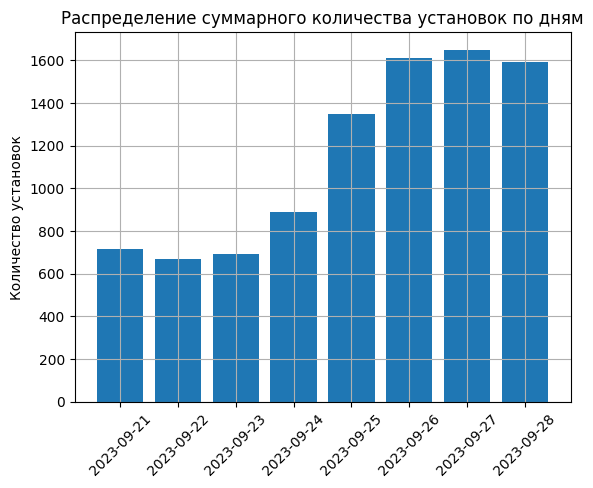

In [12]:
plt.bar(total_daily_installs['install_date'], total_daily_installs['installs'])

plt.xticks(rotation = 45)
plt.ylabel('Количество установок')
plt.title('Распределение суммарного количества установок по дням')
plt.grid(True)
plt.show()

Видим, что количество установок растет к конце периода.

## Анализ выручки

#### Распределение выручки на пользователя

In [17]:
rev_by_users = revenue.groupby('user_id')['event_revenue'].sum().sort_values(ascending = False).reset_index()
rev_by_users

,user_id,event_revenue
0,1695531074434-4844482355996598281,38.365562
1,1695384242561-367516396067394681,34.755235
2,1695512718078-8027122020366113999,32.230907
3,1695663752105-7274999797983685264,23.886972
4,1695329377672-592088068565376807,20.058372
...,...,...
8013,1695449602770-5201997,0.000000
8014,1695469560952-5009264,0.000000
8015,1695916924865-9232452,0.000000
8016,1695413480971-2873293,0.000000


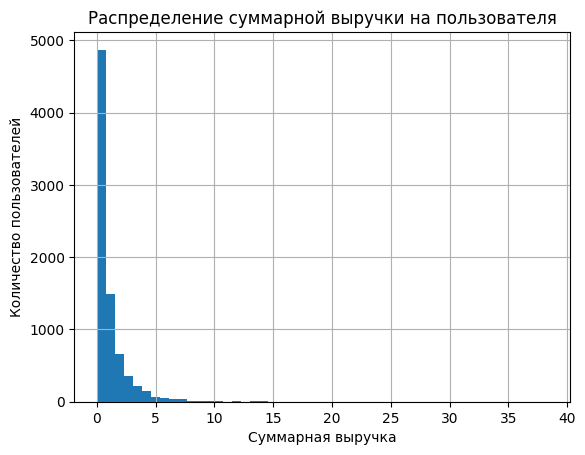

In [18]:
plt.hist(rev_by_users['event_revenue'], bins = 50)
plt.xlabel('Суммарная выручка')
plt.ylabel('Количество пользователей')
plt.title('Распределение суммарной выручки на пользователя')
plt.grid(True)
plt.show()

### Распределение выручки по дням

In [19]:
revenue.head()

,install_date,event_date,event_revenue,platform,user_id
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821


In [20]:
rev_by_days = revenue.groupby('event_date')['event_revenue'].sum().sort_values().reset_index()
rev_by_days

,event_date,event_revenue
0,2023-09-21,251.841119
1,2023-09-22,390.676763
2,2023-09-23,466.393848
3,2023-09-30,649.784867
4,2023-09-24,721.169231
5,2023-09-29,879.296382
6,2023-09-25,1015.238850
7,2023-09-26,1281.865054
8,2023-09-27,1489.934935
9,2023-09-28,1542.643879


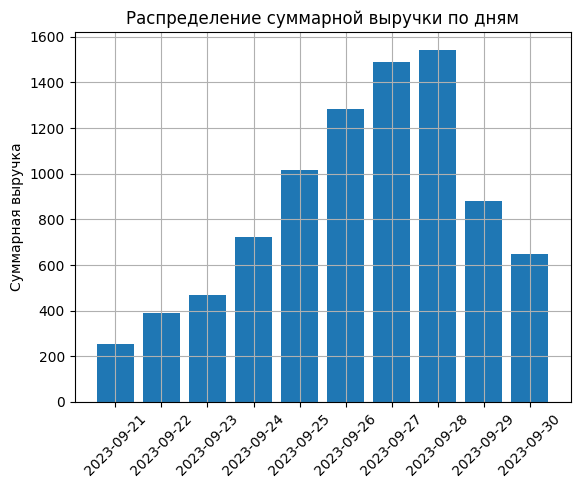

In [21]:
plt.bar(rev_by_days['event_date'], rev_by_days['event_revenue'])

plt.xticks(rotation = 45)
plt.ylabel('Суммарная выручка')
plt.title('Распределение суммарной выручки по дням')
plt.grid(True)
plt.show()

### Анализ количества пользователей

In [22]:
unique_users = revenue.groupby('event_date')['user_id'].nunique().reset_index()
unique_users.columns = ['event_date', 'users_count']


In [23]:
unique_users

,event_date,users_count
0,2023-09-21,575
1,2023-09-22,770
2,2023-09-23,878
3,2023-09-24,1187
4,2023-09-25,1798
5,2023-09-26,2364
6,2023-09-27,2756
7,2023-09-28,2979
8,2023-09-29,1806
9,2023-09-30,1398


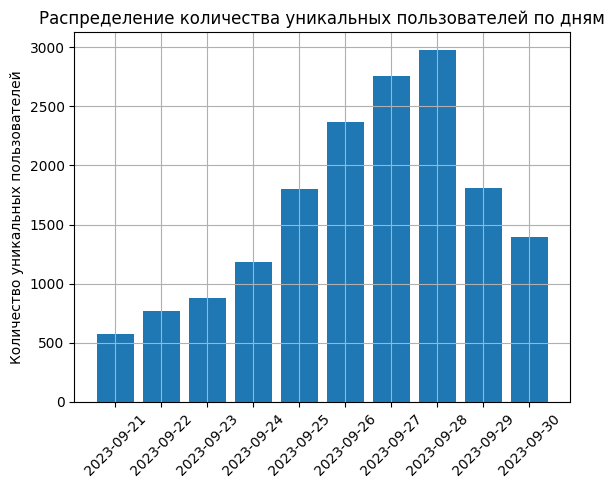

In [24]:
plt.bar(unique_users['event_date'], unique_users['users_count'])

plt.xticks(rotation = 45)
plt.ylabel('Количество уникальных пользователей')
plt.title('Распределение количества уникальных пользователей по дням')
plt.grid(True)
plt.show()

## ARPU

Рассчитаем среднюю выручку на пользователя.

In [25]:
joint_df = rev_by_days.merge(unique_users, on = 'event_date')
joint_df

,event_date,event_revenue,users_count
0,2023-09-21,251.841119,575
1,2023-09-22,390.676763,770
2,2023-09-23,466.393848,878
3,2023-09-30,649.784867,1398
4,2023-09-24,721.169231,1187
5,2023-09-29,879.296382,1806
6,2023-09-25,1015.238850,1798
7,2023-09-26,1281.865054,2364
8,2023-09-27,1489.934935,2756
9,2023-09-28,1542.643879,2979


In [26]:
joint_df['arpu'] = joint_df['event_revenue']/joint_df['users_count']
joint_df

,event_date,event_revenue,users_count,arpu
0,2023-09-21,251.841119,575,0.437985
1,2023-09-22,390.676763,770,0.507372
2,2023-09-23,466.393848,878,0.531200
3,2023-09-30,649.784867,1398,0.464796
4,2023-09-24,721.169231,1187,0.607556
5,2023-09-29,879.296382,1806,0.486875
6,2023-09-25,1015.238850,1798,0.564649
7,2023-09-26,1281.865054,2364,0.542244
8,2023-09-27,1489.934935,2756,0.540615
9,2023-09-28,1542.643879,2979,0.517840


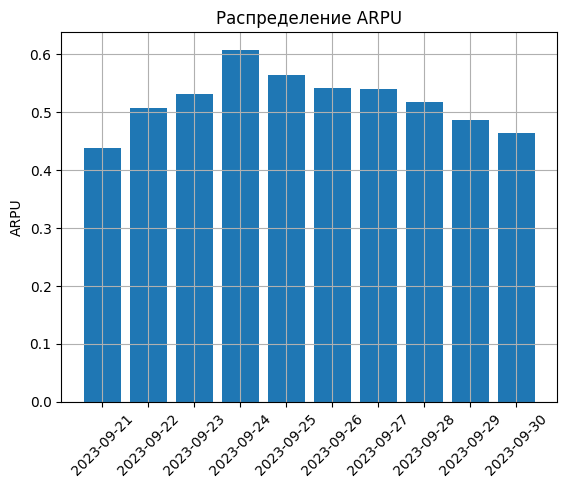

In [27]:
plt.bar(joint_df['event_date'], joint_df['arpu'])

plt.xticks(rotation = 45)
plt.ylabel('ARPU')
plt.title('Распределение ARPU')
plt.grid(True)
plt.show()

## ARPPU

Рассчитаем среднюю выручку на платящего пользователя.

In [28]:
# отсортируем неплатящих
filtered_revenue = revenue[revenue['event_revenue'].isna()]

## ARPU

In [29]:
non_payers = filtered_revenue.groupby('event_date')['user_id'].nunique().reset_index()
non_payers.columns = ['event_date', 'count']


In [30]:
joint_df2 = unique_users.merge(non_payers, on = 'event_date')
joint_df2.columns = ['event_date', 'users_count', 'nonpayers_count']
joint_df2['payers_count'] = joint_df2['users_count']-joint_df2['nonpayers_count']
joint_df2

,event_date,users_count,nonpayers_count,payers_count
0,2023-09-21,575,12,563
1,2023-09-22,770,44,726
2,2023-09-23,878,56,822
3,2023-09-24,1187,57,1130
4,2023-09-25,1798,83,1715
5,2023-09-26,2364,91,2273
6,2023-09-27,2756,128,2628
7,2023-09-28,2979,155,2824
8,2023-09-29,1806,63,1743
9,2023-09-30,1398,58,1340


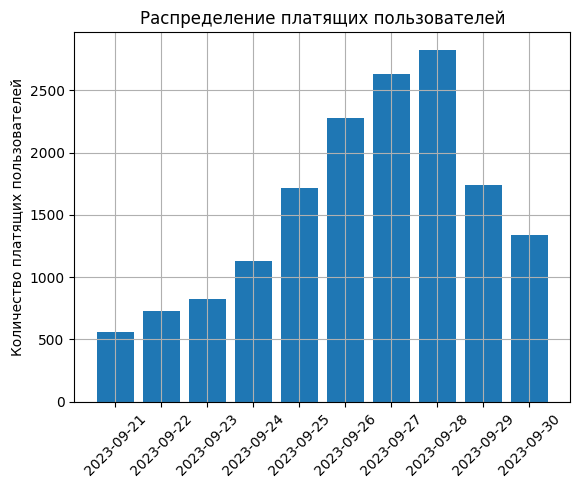

In [31]:
plt.bar(joint_df2['event_date'], joint_df2['payers_count'])

plt.xticks(rotation = 45)
plt.ylabel('Количество платящих пользователей')
plt.title('Распределение платящих пользователей')
plt.grid(True)
plt.show()

In [32]:
metrics = joint_df.merge(joint_df2, on = ['event_date', 'users_count'])
metrics['arppu'] = metrics['event_revenue']/metrics['payers_count']
metrics

,event_date,event_revenue,users_count,arpu,nonpayers_count,payers_count,arppu
0,2023-09-21,251.841119,575,0.437985,12,563,0.447320
1,2023-09-22,390.676763,770,0.507372,44,726,0.538122
2,2023-09-23,466.393848,878,0.531200,56,822,0.567389
3,2023-09-30,649.784867,1398,0.464796,58,1340,0.484914
4,2023-09-24,721.169231,1187,0.607556,57,1130,0.638203
5,2023-09-29,879.296382,1806,0.486875,63,1743,0.504473
6,2023-09-25,1015.238850,1798,0.564649,83,1715,0.591976
7,2023-09-26,1281.865054,2364,0.542244,91,2273,0.563953
8,2023-09-27,1489.934935,2756,0.540615,128,2628,0.566946
9,2023-09-28,1542.643879,2979,0.517840,155,2824,0.546262


### Анализ распределения выручки по когортам

In [33]:
# рассчитываем дни с момента установки
revenue['days_after_install'] = (revenue['event_date'] - revenue['install_date']).dt.days

In [34]:
filtered_dates = revenue[revenue['install_date'].isin(['2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24'])]
filtered_dates


<ipython-input-34-86f8a73ba411>:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_dates = revenue[revenue['install_date'].isin(['2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24'])]


,install_date,event_date,event_revenue,platform,user_id,days_after_install
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966,0
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821,0
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393,0
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393,0
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821,0
...,...,...,...,...,...,...
78707,2023-09-23,2023-09-30,0.132641,ios,1695483650486-8305144,7
78708,2023-09-21,2023-09-30,0.163922,ios,1695304430366-5304204,9
78709,2023-09-21,2023-09-30,0.024400,ios,1695304430366-5304204,9
78710,2023-09-21,2023-09-30,0.039021,ios,1695304430366-5304204,9


In [35]:
cohorts = filtered_dates.groupby('days_after_install')['event_revenue'].sum().reset_index()
cohorts = cohorts[cohorts['days_after_install'] <= 6]
cohorts

,days_after_install,event_revenue
0,0,1341.445368
1,1,516.329019
2,2,296.357504
3,3,218.535764
4,4,190.380930
5,5,139.313016
6,6,125.446646


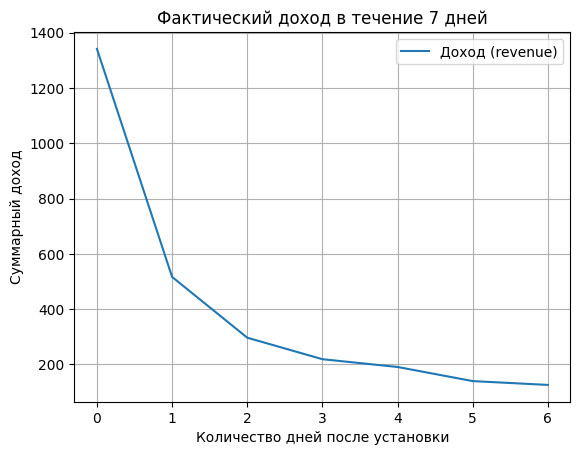

In [36]:
plt.plot(cohorts['days_after_install'], cohorts['event_revenue'], label='Доход (revenue)')

plt.xlabel('Количество дней после установки')
plt.ylabel('Суммарный доход')
plt.title('Фактический доход в течение 7 дней')
plt.legend()
plt.grid(True)
plt.show()


По графику видим, что изменение дохода со временем от дня установки уменьшается в первые дни резко, а затем плавно.  Используем для прогнозирования дохода в течение месяца гиперболическую модель, т.к. она хорошо описывает резкое падение, а затем плавное убывание, стремящееся к нулю.

In [37]:
# задаем начальные параметры
initial_guess = [1, 0.1, 0.1]

#  создаем функцию для гиперболической экстраполяции
def hyperbolic(day, a, b, c):
    return a / (b + day) + c

# настраиваем модель гиперболической регрессии
params, cov = curve_fit(hyperbolic, cohorts['days_after_install'], cohorts['event_revenue'], p0=initial_guess, maxfev=1000)

# задаем экстраполяцию на 30 дней
days = np.arange(0, 31)
predicted_revenue = hyperbolic(days, params[0], params[1], params[2])


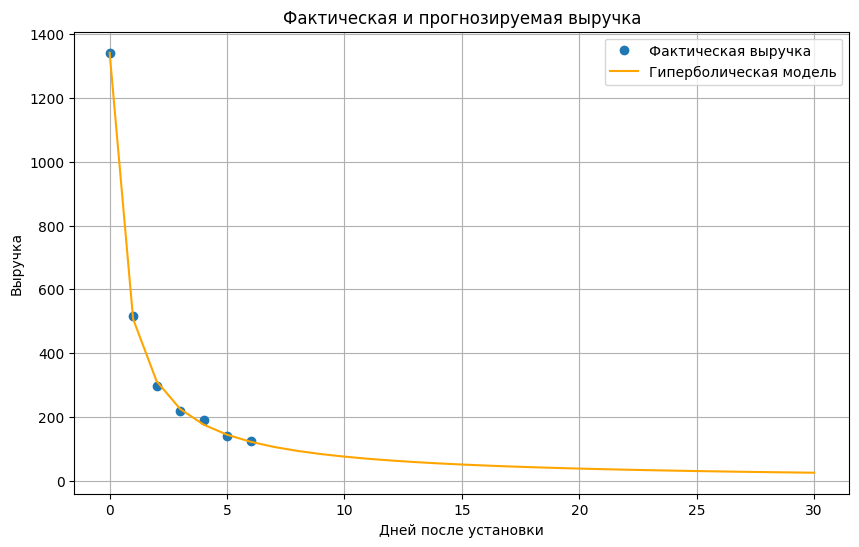

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(cohorts['days_after_install'], cohorts['event_revenue'], 'o', label='Фактическая выручка')
plt.plot(days, predicted_revenue, '-', label='Гиперболическая модель', color='orange')
plt.xlabel('Дней после установки')
plt.ylabel('Выручка')
plt.title('Фактическая и прогнозируемая выручка')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Считаем предсказанный доход за каждый день
days = np.arange(0, 31)
predicted_revenue = hyperbolic(days, params[0], params[1], params[2])

# Считаем накопленный доход к 30-му дню
cumulative_revenue_day30 = predicted_revenue.cumsum()[-1]

In [40]:
# Доход за 0, 1 и 3 день
revenue_day0 = predicted_revenue[0]
revenue_day1 = predicted_revenue[1]
revenue_day3 = predicted_revenue[3]

# Сравниваем с накопленным доходом к 30-му дню
diff_day_0_30 = revenue_day0 / cumulative_revenue_day30
diff_day_1_30 = revenue_day1 / cumulative_revenue_day30
diff_day_3_30 = revenue_day3 / cumulative_revenue_day30

In [41]:
print(f'Доля дохода от 0 дня в накопленном доходе к 30 дню: {diff_day_0_30:.2%}')
print(f'Доля дохода от 1 дня в накопленном доходе к 30 дню: {diff_day_1_30:.2%}')
print(f'Доля дохода от 3 дня в накопленном доходе к 30 дню: {diff_day_3_30:.2%}')

Доля дохода от 0 дня в накопленном доходе к 30 дню: 33.63%
Доля дохода от 1 дня в накопленном доходе к 30 дню: 12.70%
Доля дохода от 3 дня в накопленном доходе к 30 дню: 5.64%
